In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_PL = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Poland')].copy()

In [3]:
df_DA_PL['job_posted_month_no'] = df_DA_PL['job_posted_date'].dt.month

In [4]:
df_DA_PL_explode = df_DA_PL.explode('job_skills')

In [5]:
df_DA_PL_pivot = df_DA_PL_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_PL_pivot.loc['Total'] = df_DA_PL_pivot.sum()

df_DA_PL_pivot = df_DA_PL_pivot[df_DA_PL_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_PL_pivot = df_DA_PL_pivot.drop('Total')

df_DA_PL_pivot

job_skills,sql,python,excel,tableau,power bi,azure,r,aws,gcp,sas,...,flask,gitlab,plotly,unix,react,db2,powerbi,atlassian,angular,cassandra
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,58,32,33,32,12,8,11,7,5,4,...,0,0,0,1,0,0,0,0,0,0
2,54,37,32,18,15,10,16,4,3,8,...,0,0,0,0,0,0,0,0,0,0
3,40,32,37,30,21,9,18,7,4,6,...,0,0,1,0,0,0,0,0,0,0
4,40,24,18,26,16,12,4,16,12,0,...,0,0,0,0,0,0,0,0,0,0
5,29,24,19,12,9,10,5,10,7,2,...,0,0,0,0,0,0,0,0,0,0
6,17,12,14,6,4,1,3,2,0,4,...,0,0,0,0,0,0,0,0,0,0
7,31,23,14,10,13,3,5,2,2,6,...,0,1,0,0,0,0,0,0,0,0
8,25,14,21,6,10,6,4,0,2,2,...,0,0,0,0,0,0,1,0,0,1
9,20,18,10,8,4,3,1,1,0,2,...,0,0,0,0,0,0,0,1,0,0


In [6]:
DA_totals = df_DA_PL.groupby('job_posted_month_no').size()

In [7]:
df_DA_PL_percent = df_DA_PL_pivot.div(DA_totals/100, axis=0)

df_DA_PL_percent

job_skills,sql,python,excel,tableau,power bi,azure,r,aws,gcp,sas,...,flask,gitlab,plotly,unix,react,db2,powerbi,atlassian,angular,cassandra
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,80.555556,44.444444,45.833333,44.444444,16.666667,11.111111,15.277778,9.722222,6.944444,5.555556,...,0.000000,0.000000,0.000000,1.388889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,73.972603,50.684932,43.835616,24.657534,20.547945,13.698630,21.917808,5.479452,4.109589,10.958904,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,57.971014,46.376812,53.623188,43.478261,30.434783,13.043478,26.086957,10.144928,5.797101,8.695652,...,0.000000,0.000000,1.449275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,66.666667,40.000000,30.000000,43.333333,26.666667,20.000000,6.666667,26.666667,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,63.043478,52.173913,41.304348,26.086957,19.565217,21.739130,10.869565,21.739130,15.217391,4.347826,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,68.000000,48.000000,56.000000,24.000000,16.000000,4.000000,12.000000,8.000000,0.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,83.783784,62.162162,37.837838,27.027027,35.135135,8.108108,13.513514,5.405405,5.405405,16.216216,...,0.000000,2.702703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,73.529412,41.176471,61.764706,17.647059,29.411765,17.647059,11.764706,0.000000,5.882353,5.882353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.941176,0.000000,0.000000,2.941176
9,83.333333,75.000000,41.666667,33.333333,16.666667,12.500000,4.166667,4.166667,0.000000,8.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.166667,0.000000,0.000000


In [8]:
df_DA_PL_percent = df_DA_PL_percent.reset_index()
df_DA_PL_percent['job_posted_month'] = df_DA_PL_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_PL_percent = df_DA_PL_percent.set_index('job_posted_month')
df_DA_PL_percent = df_DA_PL_percent.drop(columns='job_posted_month_no')

df_DA_PL_percent

job_skills,sql,python,excel,tableau,power bi,azure,r,aws,gcp,sas,...,flask,gitlab,plotly,unix,react,db2,powerbi,atlassian,angular,cassandra
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,80.555556,44.444444,45.833333,44.444444,16.666667,11.111111,15.277778,9.722222,6.944444,5.555556,...,0.000000,0.000000,0.000000,1.388889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,73.972603,50.684932,43.835616,24.657534,20.547945,13.698630,21.917808,5.479452,4.109589,10.958904,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,57.971014,46.376812,53.623188,43.478261,30.434783,13.043478,26.086957,10.144928,5.797101,8.695652,...,0.000000,0.000000,1.449275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,66.666667,40.000000,30.000000,43.333333,26.666667,20.000000,6.666667,26.666667,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,63.043478,52.173913,41.304348,26.086957,19.565217,21.739130,10.869565,21.739130,15.217391,4.347826,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,68.000000,48.000000,56.000000,24.000000,16.000000,4.000000,12.000000,8.000000,0.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,83.783784,62.162162,37.837838,27.027027,35.135135,8.108108,13.513514,5.405405,5.405405,16.216216,...,0.000000,2.702703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,73.529412,41.176471,61.764706,17.647059,29.411765,17.647059,11.764706,0.000000,5.882353,5.882353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.941176,0.000000,0.000000,2.941176
Sep,83.333333,75.000000,41.666667,33.333333,16.666667,12.500000,4.166667,4.166667,0.000000,8.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.166667,0.000000,0.000000


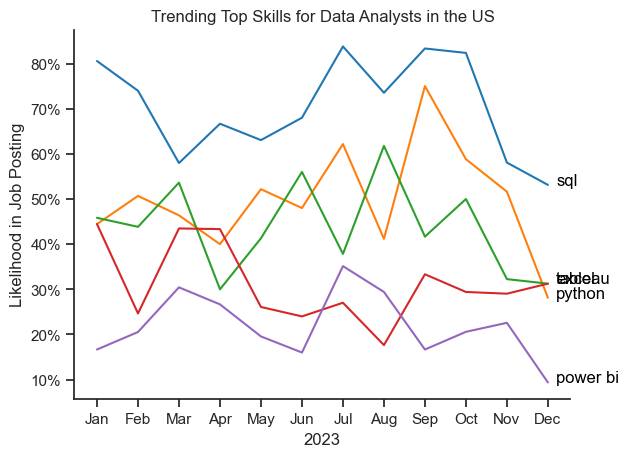

In [18]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_PL_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()